# Data Science Job Salaries

In this notebook we are going to explore information from Data Science Job Salaries dataset.


#### Some question we are trying to answer:

1. What **job title** are the most and how are they distributed? based on:
    * Experience Level
    * Employment Type
    * Remote Ratio
    * Company Size
    
2. What countries do employees come from?
3. What countries do companies come from?
4. How many employees work in their own country?
5. How **salaries** are distributed? based on:
    * Experience Level
    * Employment Type
    * Job Title
    * Remote Ratio
    * Company Size
6. From which country is the company paid more for data science job?


## Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings(action= 'ignore')

sns.set_palette('Set2')
sns.set_style('dark')

## Loading and Manipulating the Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [3]:
df = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv', index_col='Unnamed: 0')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
unused_columns = ['work_year', 'salary', 'salary_currency']
df.drop(columns=unused_columns, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   experience_level    607 non-null    object
 1   employment_type     607 non-null    object
 2   job_title           607 non-null    object
 3   salary_in_usd       607 non-null    int64 
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
dtypes: int64(2), object(6)
memory usage: 42.7+ KB


Okay, we need to change category name to be more informative.

We got ISO3166 country name dictionary from https://gist.github.com/carlopires/1261951/d13ca7320a6abcd4b0aa800d351a31b54cefdff4

Thank you, ***carlopires***!

In [7]:
# Experience Level
experience_level_dict = {'EN':'Entry Level/Junior', 
                         'MI':'Mid Level/Intermediate', 
                         'SE':'Senior Level/Expert', 
                         'EX':'Executive Level/Director'}

df['experience_level'] = df['experience_level'].map(experience_level_dict)


# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}

df['employment_type'] = df['employment_type'].map(employment_type_dict)

# Remote Ratio
remote_ratio_dict = {0: 'No Remote',
                     50: 'Partially Remote',
                    100: 'Fully Remote'}

df['remote_ratio'] = df['remote_ratio'].map(remote_ratio_dict)


# ISO
ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

df['employee_residence'] = df['employee_residence'].map(ISO3166)
df['company_location'] = df['company_location'].map(ISO3166)


# Company Size
company_size_dict = {'S': 'Small',
                    'M':'Medium',
                    'L': 'Large'}
df['company_size'] = df['company_size'].map(company_size_dict)

In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,Mid Level/Intermediate,Full Time,Data Scientist,79833,Germany,No Remote,Germany,Large
1,Senior Level/Expert,Full Time,Machine Learning Scientist,260000,Japan,No Remote,Japan,Small
2,Senior Level/Expert,Full Time,Big Data Engineer,109024,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
3,Mid Level/Intermediate,Full Time,Product Data Analyst,20000,Honduras,No Remote,Honduras,Small
4,Senior Level/Expert,Full Time,Machine Learning Engineer,150000,United States of America,Partially Remote,United States of America,Large


#### 7 Most Data Science Job Titles

In [10]:
seven_most_needed_job_titles = df['job_title'].value_counts().head(7)
seven_most_needed_job_titles

Data Scientist               142
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            15
Data Science Manager          12
Data Architect                11
Name: job_title, dtype: int64

In percentage

In [11]:
total_rows = df.shape[0]
seven_most_needed_job_titles*100/total_rows

Data Scientist               23.471074
Data Engineer                21.818182
Data Analyst                 16.033058
Machine Learning Engineer     6.776860
Research Scientist            2.479339
Data Science Manager          1.983471
Data Architect                1.818182
Name: job_title, dtype: float64

23.4 percent employees are Data Scientist, 21.8 percent are Data Engineer, and 16.03 percent are Data Analyst.
The rest job title are below 10 percent.

#### How are they distibuted based on experience level and employment type?

In [12]:
seven_job_title_only = df[df['job_title'].isin([i for i in seven_most_needed_job_titles.index])]

#### Job Title and Experience Level

In [13]:
def my_catplot(variable:str, hue_order=None, title=None):
    sns.catplot(data=seven_job_title_only, 
                x='job_title', 
                kind='count', 
                height=10, 
                hue=variable,
                hue_order=hue_order)

    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.xlabel('Job Title')
    plt.title(title)
    ;


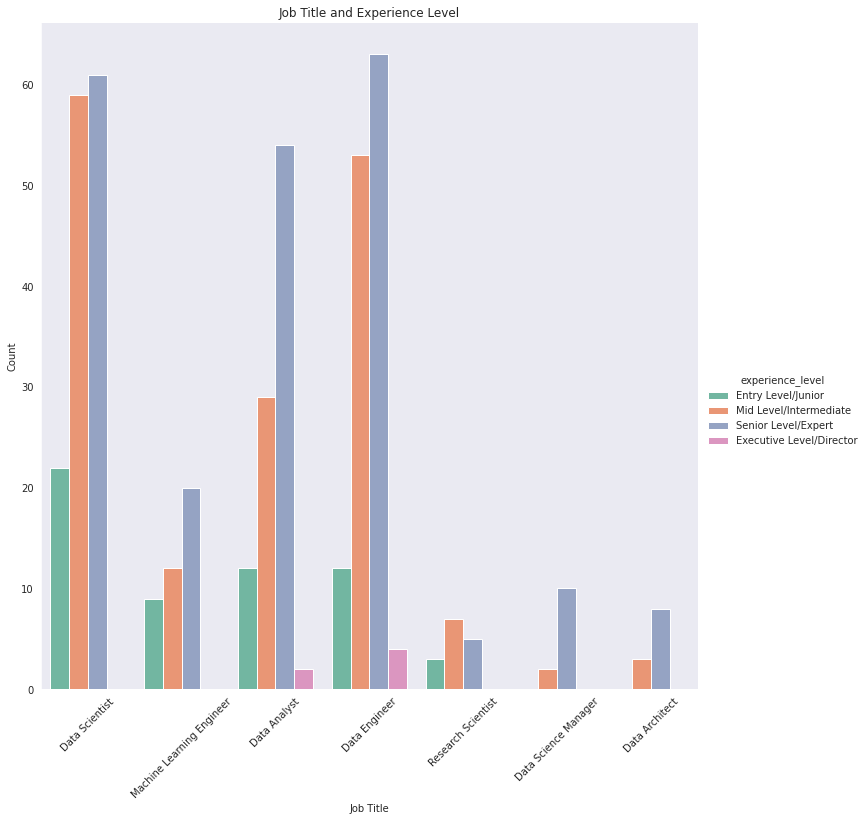

In [14]:
exp_order=['Entry Level/Junior','Mid Level/Intermediate','Senior Level/Expert','Executive Level/Director']

my_catplot(variable='experience_level', hue_order=exp_order, title='Job Title and Experience Level')

**Senior Level** experience level is the most number in almost every job title and **Executive Level** only exist in Data Analyst and Data Engineer with relatively lesser than other experience level for 7 most job title in the dataset

#### Job Title and Employment Type

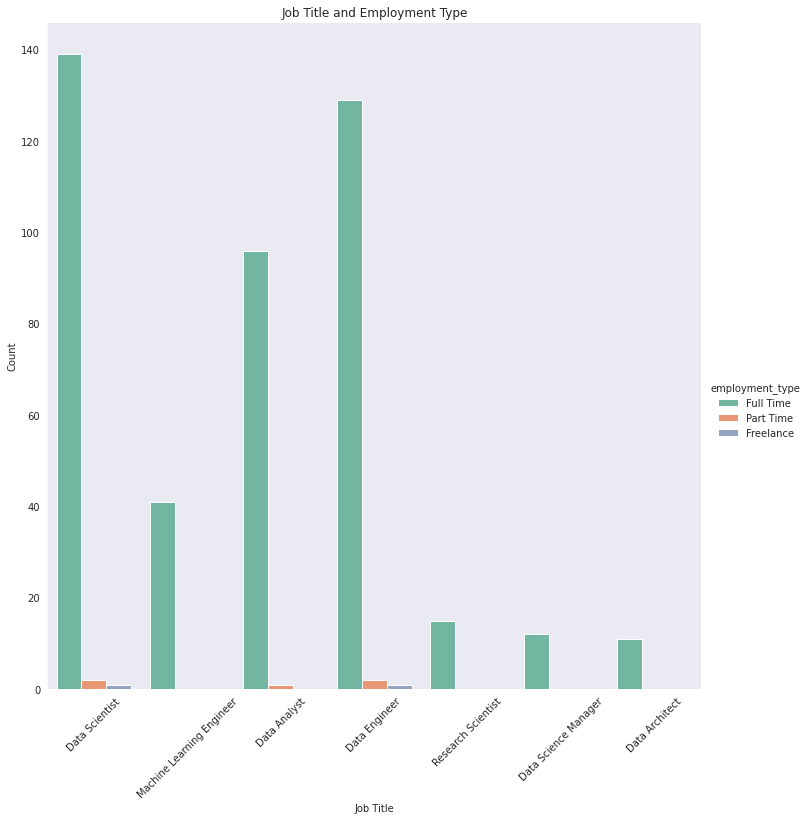

In [15]:
my_catplot(variable='employment_type', title='Job Title and Employment Type')

**Full Time** workers are dominating in every job title

#### Job Title and Company Size

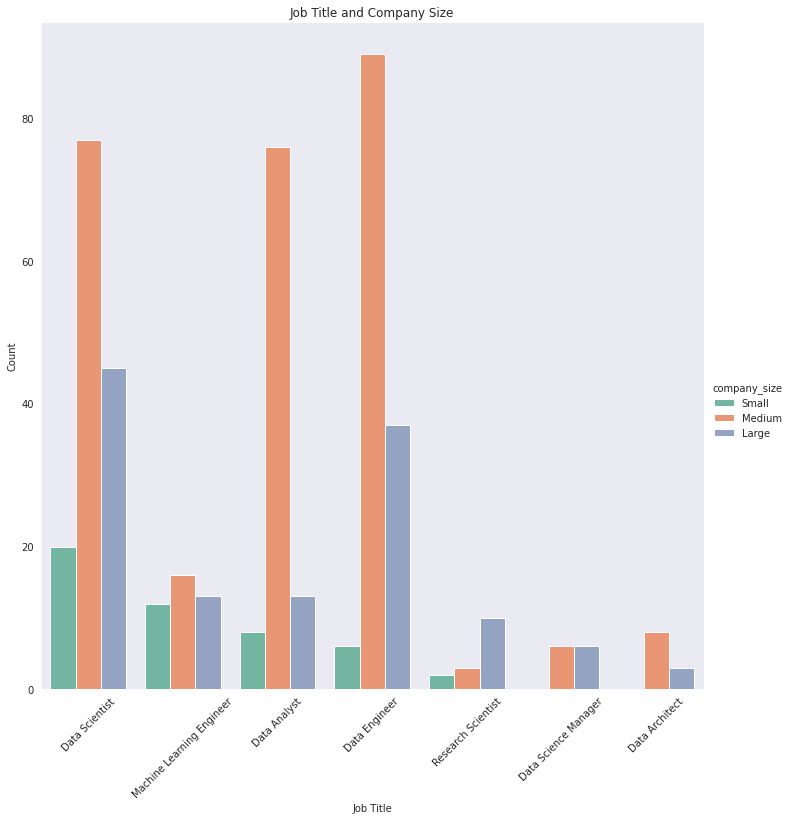

In [16]:
my_catplot(variable='company_size', hue_order = ['Small', 'Medium', 'Large'], title='Job Title and Company Size')

Most of employees work in company that has 50 to 250 employees (Medium company size).
Large company tends to more need Research Scientist than medium and small company.

#### Job Title and Remote Ratio

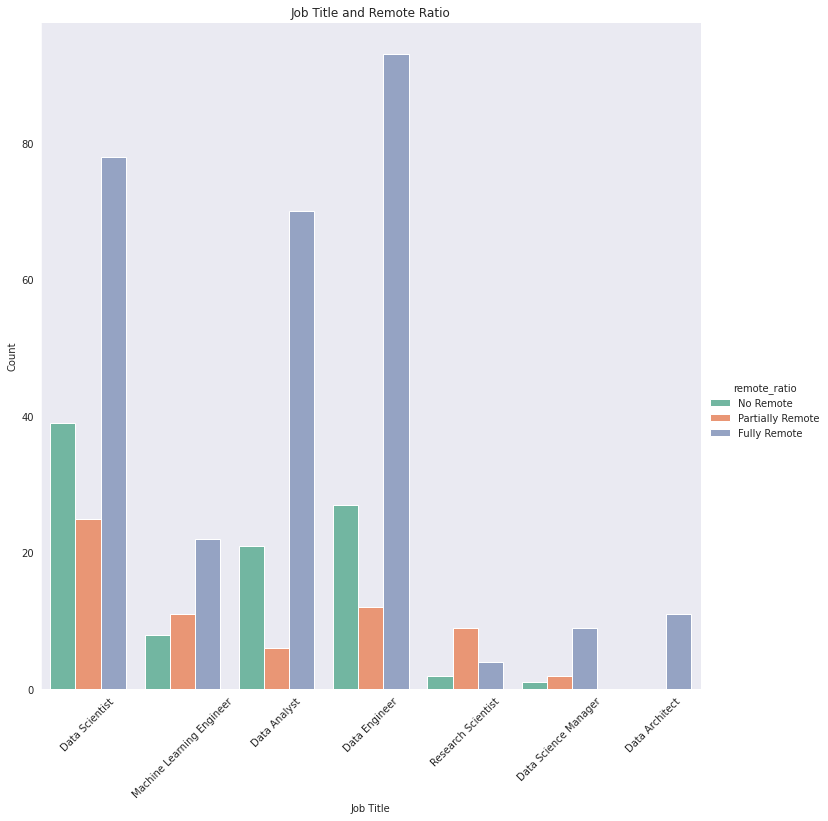

In [17]:
my_catplot(variable='remote_ratio', title='Job Title and Remote Ratio')

Most of employees are working remotely, except, research Scientist tend to works partially remote.

#### What countries do employees come from?

In [18]:
seven_most_employee_residence = df['employee_residence'].value_counts().head(7)
seven_most_employee_residence

United States of America          332
United Kingdom (Great Britain)     44
India                              30
Canada                             29
Germany                            25
France                             18
Spain                              15
Name: employee_residence, dtype: int64

#### What countries do employees come from?

In [19]:
seven_most_company_location = df['company_location'].value_counts().head(7)
seven_most_company_location

United States of America          355
United Kingdom (Great Britain)     47
Canada                             30
Germany                            27
India                              24
France                             15
Spain                              14
Name: company_location, dtype: int64

#### How many employee workin their own country?

In [20]:
residence_company = df[['employee_residence', 'company_location']]

a = []
for (i, j) in zip(residence_company['employee_residence'], residence_company['company_location']):
    if i == j:
        a.append('Yes')
    else:
        a.append('No')
        
residence_company['work_own_country'] = a

In [21]:
residence_company['work_own_country'].value_counts()

Yes    556
No      49
Name: work_own_country, dtype: int64

Most of the employees are working in their own country

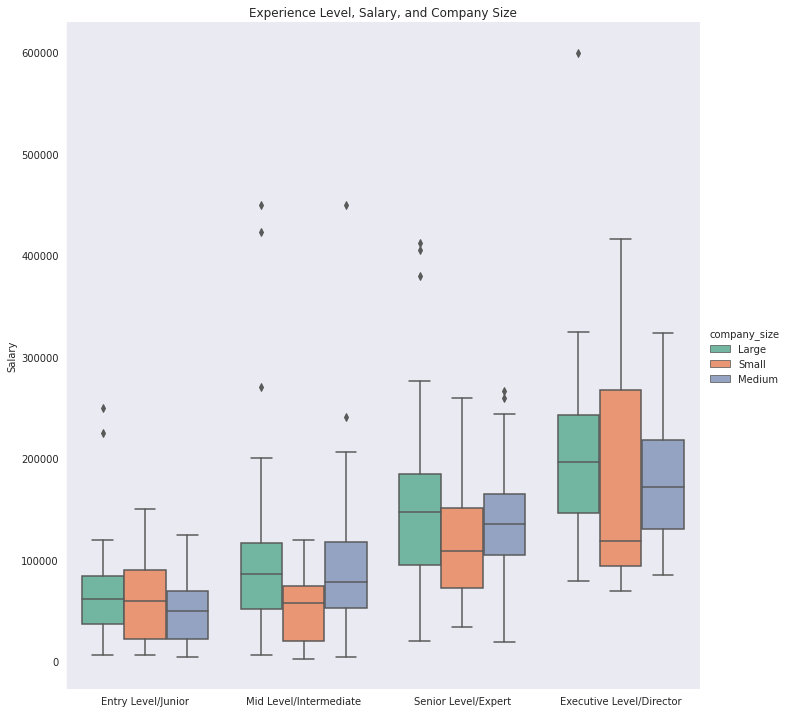

In [22]:
sns.catplot(data=df,
            x='experience_level',
            y ='salary_in_usd',
            order=exp_order,
            height= 10,
            kind='box',
            hue='company_size')

plt.title('Experience Level, Salary, and Company Size')
plt.ylabel('Salary')
plt.xlabel('');

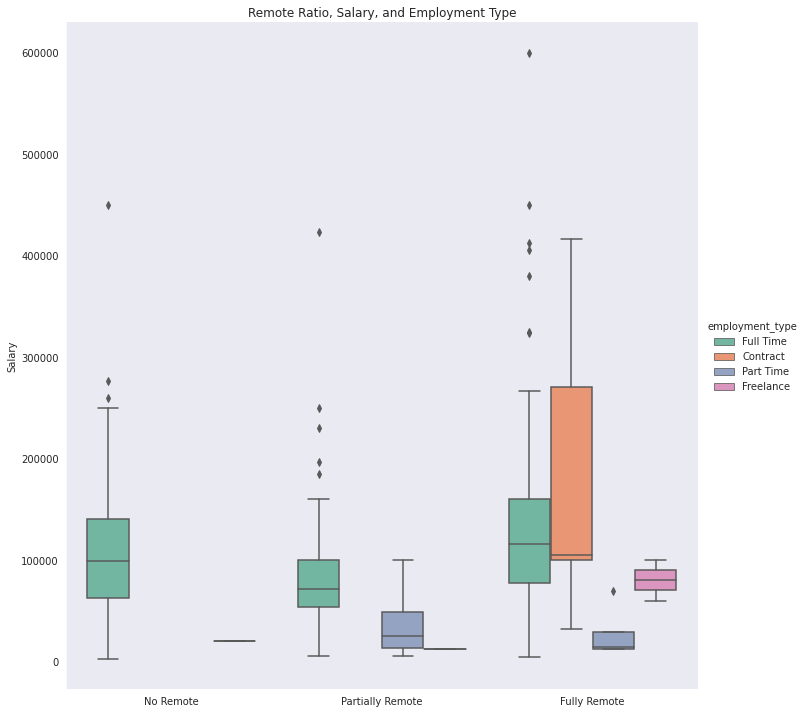

In [23]:
sns.catplot(data=df,
            x='remote_ratio',
            y ='salary_in_usd',
            height= 10,
            kind='box',
            hue='employment_type')

plt.title('Remote Ratio, Salary, and Employment Type')
plt.ylabel('Salary')
plt.xlabel('');

In [24]:
seven_country_company_location = df['company_location'].value_counts().head(7)

In [25]:
seven_country_only_company_location = df[df['company_location'].isin([i for i in seven_country_company_location.index])]

In [26]:
company_country_high_paid = seven_country_only_company_location[['company_location', 'salary_in_usd']].groupby(by='company_location').mean().sort_values(by='salary_in_usd', ascending=False)

''

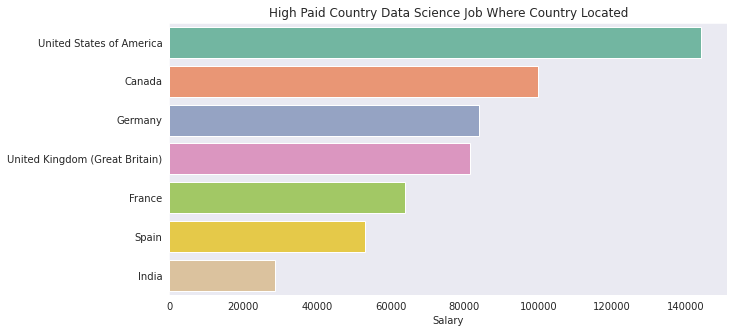

In [27]:
plt.figure(figsize=(10, 5))

sns.barplot(data=company_country_high_paid, y=company_country_high_paid.index, x='salary_in_usd')

plt.ylabel('')
plt.xlabel('Salary')
plt.title('High Paid Country Data Science Job Where Country Located')
;

In [28]:
seven_country_employee_residence = df['employee_residence'].value_counts().head(7)

In [29]:
seven_country_only_employee_residence = df[df['employee_residence'].isin([i for i in seven_country_employee_residence.index])]

In [30]:
employee_country_high_paid = seven_country_only_employee_residence[['employee_residence', 'salary_in_usd']].groupby(by='employee_residence').mean().sort_values(by='salary_in_usd', ascending=False)

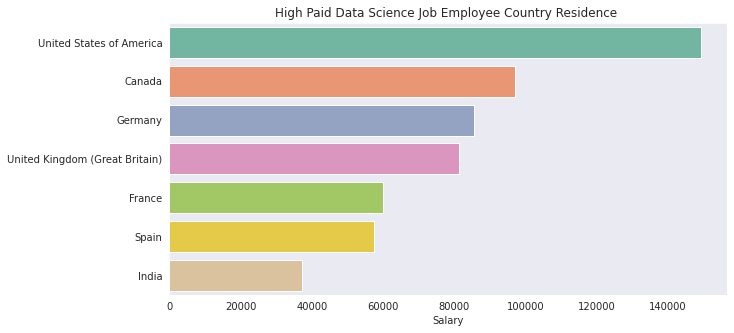

In [31]:
plt.figure(figsize=(10, 5))

sns.barplot(data=employee_country_high_paid, y=employee_country_high_paid.index, x='salary_in_usd')

plt.ylabel('')
plt.xlabel('Salary')
plt.title('High Paid Data Science Job Employee Country Residence ');